## MNIST Data Set (Modified National Institute of Standards and Technology)

In [3]:
import sys
print(sys.version)

!{sys.executable} -m pip install tensorflow

3.7.9 (default, Sep  9 2020, 00:09:07) 
[Clang 11.0.3 (clang-1103.0.32.62)]


In [5]:
from tensorflow import keras
print(keras.__version__)
#
from tensorflow.keras.datasets import mnist

2.4.0


Load the model

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
print("Train Images shape: {}, {}".format(train_images.shape, train_images.dtype))
print("{} train labels".format(len(train_labels)))
print("Train labels: {}".format(train_labels))

Train Images shape: (60000, 28, 28), uint8
60000 train labels
Train labels: [5 0 4 ... 5 6 8]


In [8]:
print("Test Iages shape: {}, {}".format(test_images.shape, test_images.dtype))
print("{} test labels".format(len(test_labels)))
print("Test labels: {}".format(test_labels))

Test Iages shape: (10000, 28, 28), uint8
10000 test labels
Test labels: [7 2 1 ... 4 5 6]


### Network Architecture

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Now, we reshape the data
- Images are `(28 * 28, uint8)`, we need `(28 * 28, float32)`
- Images' pixels are in `[0, 255]`, we need them in `[0, 1]`

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [15]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### A look at the new shapes

In [16]:
print("Train Images shape: {}, {}".format(train_images.shape, train_images.dtype))
print("{} train labels".format(len(train_labels)))
print("Train labels: {}".format(train_labels))

print("Test Iages shape: {}, {}".format(test_images.shape, test_images.dtype))
print("{} test labels".format(len(test_labels)))
print("Test labels: {}".format(test_labels))

Train Images shape: (60000, 784), float32
60000 train labels
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test Iages shape: (10000, 784), float32
10000 test labels
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Now we train the model for real

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2558 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1041 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0674 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0499 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9888


### Get an idea of how good the model is
Using the _test_ data

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test Accuracy: {}".format(test_acc))

313/313 [==============================] - 0s 625us/step - loss: 0.0673 - accuracy: 0.9807
Test Accuracy: 0.9807000160217285


### Put it at work
We put the model (`network`) at work on random test data

In [19]:
print("Test Data: {} elements".format(len(test_images)))

Test Data: 10000 elements


In [21]:
import random
import numpy as np

sample_idx = []
for i in range(5):
    sample_idx.append(random.randint(0, len(test_images)) - 1)

print("Will test indexes {}".format(sample_idx))

Will test indexes [8346, 6223, 2554, 1012, 1294]


10000 elements, of 10 values
Predictions [[3.58167584e-09 2.21706778e-10 1.04973315e-05 ... 9.99906898e-01
  2.19377458e-08 6.84982453e-08]
 [1.94260545e-11 1.21885208e-07 9.99999881e-01 ... 2.51206873e-18
  4.52190418e-09 6.85623044e-18]
 [5.10468254e-08 9.99068797e-01 8.97577265e-05 ... 3.35162389e-04
  4.54058871e-04 4.03771878e-07]
 ...
 [7.28605883e-14 1.94662800e-10 5.59036741e-11 ... 1.33124349e-05
  4.40430404e-06 4.78470838e-06]
 [3.58984953e-09 2.06417508e-10 6.59702154e-11 ... 6.38063047e-10
  2.05516742e-04 2.96602088e-12]
 [1.71304437e-09 4.51938565e-17 3.43697959e-10 ... 1.88026449e-15
  2.05977596e-11 1.39615519e-13]]
Index 8346 => (784,)


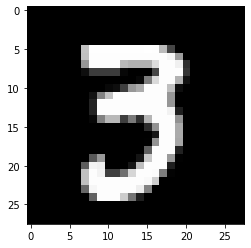

I say it's a 3 (100.00 % sure)

Index 6223 => (784,)


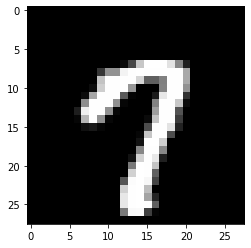

I say it's a 7 (99.99 % sure)

Index 2554 => (784,)


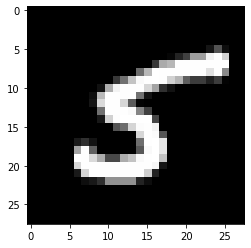

I say it's a 5 (100.00 % sure)

Index 1012 => (784,)


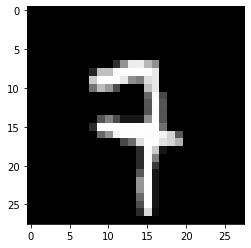

I say it's a 7 (97.11 % sure)

Index 1294 => (784,)


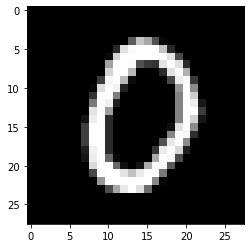

I say it's a 0 (100.00 % sure)



In [29]:
!{sys.executable} -m pip install matplotlib
# %matplotlib inline
# %pylab inline
import matplotlib.pyplot as plt

predictions = network.predict(test_images)
print("{} elements, of {} values".format(len(predictions), len(predictions[0])))
print("Predictions {}".format(predictions))
      
for idx in sample_idx:
    print("Index {} => {}".format(idx, test_images[idx].shape))
    pixels = test_images[idx].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print("I say it's a {} ({:0.2f} % sure)\n".format(np.argmax(predictions[idx]), float(100 * predictions[idx][np.argmax(predictions[idx])]) ))


And this is it.